# Image Preprocessing

### Journal Articles
- Automatic Classification of Normal and Cancer Lung CT Images Using Multiscale AM-FM Features (Magdy et al. 2015)
-https://www.hindawi.com/journals/ijbi/2015/230830/ (see section 2.2 Image Preprocessing)

- A review on CT image noise and its denoising (Diwakar and Kumar 2018)
-https://www.sciencedirect.com/science/article/pii/S1746809418300107 (log in through UChicago, see section: 4. CT image
denoising methods)

### An overview of semantic image segmentation - Jeremy Jordan
- https://www.jeremyjordan.me/semantic-segmentation/

### Notes
- May need to convert images to Hounsfield Units (see kaggle preprocessing tutorial) to have reasonable cutoff ranges in algorithms like region growing.

### Opencv Hough Circles
- https://www.pyimagesearch.com/2014/07/21/detecting-circles-images-using-opencv-hough-circles/
- https://stackoverflow.com/questions/48356398/opencv-remove-background-of-an-image/48356640#48356640
- https://www.youtube.com/watch?v=CJMCoAsK-h0
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghcircles/py_houghcircles.html
- https://medium.com/@riazmunshi/practical-opencv-3-image-processing-with-python-1b34949fc516
- https://www.youtube.com/watch?v=-o9jNEbR5P8

### Seeded region growing

- https://stackoverflow.com/questions/14416511/seeded-region-growing-with-opencv

### Image Binarization
- How to set a threshold for binarization
-https://stackoverflow.com/questions/9506841/using-python-pil-to-turn-a-rgb-image-into-a-pure-black-and-white-image
- After binarization, need to use different feature extraction methods. (I.e. spicularity, rotundness, etc.)

# Grayscale thresholding

In [1]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data_dir = 'C:/Users/moogl/Desktop/UChicago/Capstone Project/2. Implementation/Lung CT Data/SPIE-AAPM Lung CT Challenge/'
nodule_list = os.listdir(data_dir + '3. Slice Crop')
nodule_list[0]

'CT-Training-BE001_cropped.tiff'

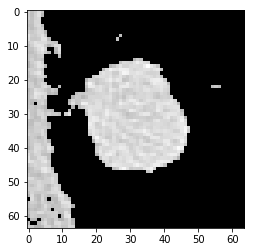

In [3]:
nodule_image_file = Image.open(data_dir + "3. Slice Crop/" + nodule_list[8])
image = np.array(nodule_image_file)

threshold = 180

for i in range(len(image)):
    for j in range(len(image[0])):
        if image[i][j] < threshold:
            image[i][j] = 0

plt.imshow(image, cmap='gray')

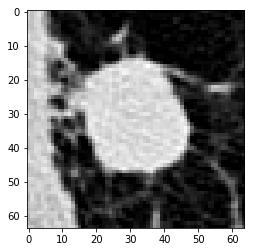

In [4]:
plt.imshow(nodule_image_file, cmap='gray')

# cv2 implementation

### Medical segmentation
- https://stackoverflow.com/questions/42297665/medical-image-segmentation-with-cv2
- Morphological Transformations - Sentdex
-https://www.youtube.com/watch?v=YA5u2PI3hF0

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
data_dir = 'C:/Users/moogl/Desktop/UChicago/Capstone Project/2. Implementation/Lung CT Data/SPIE-AAPM Lung CT Challenge/'
nodule_list = os.listdir(data_dir + '3. Slice Crop')
nodule_list[8]

'CT-Training-LC008_cropped.tiff'

### grayscale thresholding using cv2.inRange()

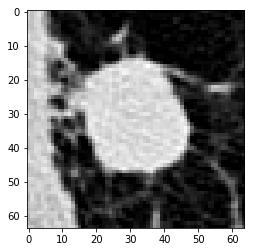

In [7]:
nodule_image = cv2.imread(data_dir + "3. Slice Crop/" + nodule_list[8], 0)
plt.imshow(nodule_image, cmap='gray')

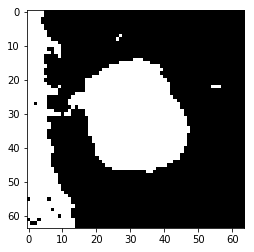

In [8]:
# Create a binarized mask of the original image
mask_thresholded = cv2.inRange(nodule_image, 180, 255)
plt.imshow(mask_thresholded, cmap='gray')

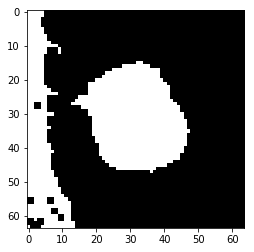

In [12]:
# Morphological operations
kernel = np.ones((2,2), np.uint8)

erosion = cv2.erode(mask_thresholded, kernel, iterations=1)
dilation = cv2.dilate(mask_thresholded, kernel, iterations=1)

opening = cv2.morphologyEx(mask_thresholded, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(mask_thresholded, cv2.MORPH_CLOSE, kernel)

tophat = cv2.morphologyEx(mask_thresholded, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(mask_thresholded, cv2.MORPH_BLACKHAT, kernel)

plt.imshow(erosion, cmap='gray')

# Merge mask with original image

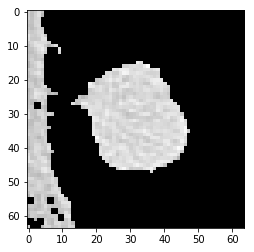

In [13]:
merged = cv2.bitwise_and(nodule_image, nodule_image, mask=erosion)
plt.imshow(merged, cmap='gray')

In [18]:
# save image and use GIMP to remove other elements
from scipy import misc
misc.imsave(data_dir + '5. Merged Masks/' + nodule_list[8], merged)

In [17]:
nodule_list[8]

'CT-Training-LC008_cropped.tiff'

### Circle detection

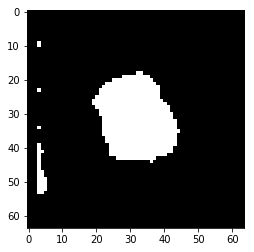

In [179]:
## (3) Find the min-area contour
im2, contours, hierarchy = cv2.findContours(erosion, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

plt.imshow(cv2.drawContours(erosion, contours, -1, (0,255,0), 3), cmap='gray')